<a href="https://colab.research.google.com/github/WayneGretzky1/CSCI-4521-Applied-Machine-Learning/blob/main/1_2_NN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download & load seed dataset

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
df = pd.read_csv("https://raw.githubusercontent.com/be-prado/csci4521/refs/heads/main/Seeds.csv")

In [9]:
df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry,groove_length,wheat_type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### Create features and label matricies

In [10]:
# TODO: make a dataframe with only the selected features 'area' and 'compactness'
features = df[['area', 'compactness']]

In [11]:
# TODO: make a dataframe with only the labels
labels = df['wheat_type']

In [12]:
# TODO: move data from dataframes to numpy arrays
features = features.to_numpy()
labels = labels.to_numpy()

### Classifying new seeds

What type would we expect a seed with an area of 12 cm^2 and a compactness/roundness of 0.9? Guesses?

In [13]:
np.set_printoptions(suppress=True) #Set numpy to print not in scientific notation

In [14]:
# functions from last time

def distance_sq(p0, p1):
  '''Computes squared Euclidean distance'''
  return np.sum( (p0-p1)**2 )


# nearest neighbor classifier for single sample
def nn_classify_sample(training_set, training_labels, new_example):
  dists = np.array([distance_sq(t,new_example) for t in training_set])
  nearest_idx = dists.argmin()
  return training_labels[nearest_idx]

### Automating nearest neighbors classification:

In [16]:
# TODO: practice using classification function
nn_classify_sample(features, labels, np.array([12,0.9]))

np.int64(3)

In [17]:
# TODO: create helper function called nn_classify for classifying a set of example features (stored in numpy arrays!)
def nn_classify(training_set, training_labels, new_data):
  data_size = new_data.shape[0]
  result = np.zeros(data_size)
  for i in range(data_size):
    result[i] = nn_classify_sample(training_set, training_labels, new_data[i])
  return result

### Drawing neighbor maps:

In [18]:
#Test every possible feature pair between min and max feature values
n = 100  # step size in the mesh
x_min, x_max = features[:, 0].min() - 0.2, features[:, 0].max() + 0.2
y_min, y_max = features[:, 1].min() - 0.2, features[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, n), np.linspace(y_min, y_max, n))
test_features = np.array([xx.ravel(), yy.ravel()]).transpose()
print("Array of grid data points that will be tested in our classification:")
print(test_features)

Array of grid data points that will be tested in our classification:
[[10.39       0.6081   ]
 [10.5010101  0.6081   ]
 [10.6120202  0.6081   ]
 ...
 [21.1579798  1.1183   ]
 [21.2689899  1.1183   ]
 [21.38       1.1183   ]]


In [19]:
# classify all the grid data points
z = nn_classify(features, labels, test_features)
print("Classification of the artificial data points:")
print(z)

Classification of the artificial data points:
[3. 3. 3. ... 2. 2. 2.]


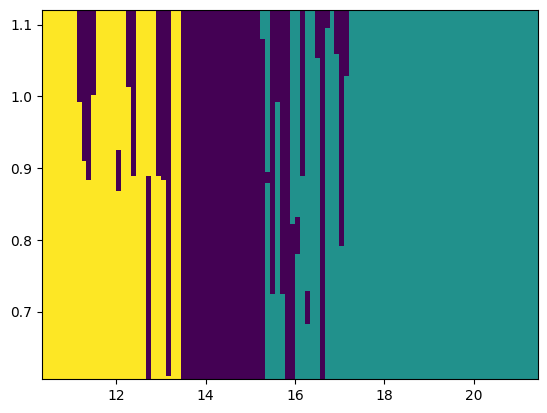

In [20]:
z = z.reshape(xx.shape) # make classification array into a 2D array for plot
fig = plt.figure()
plt.pcolormesh(xx, yy, z)

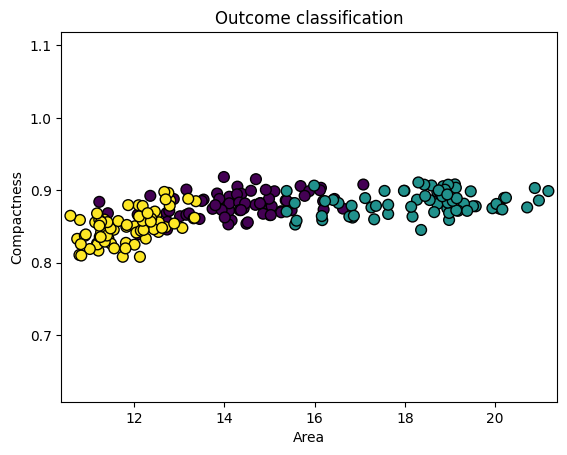

In [21]:
plt.scatter(features[:, 0], features[:, 1], c=labels, edgecolor='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Outcome classification")
plt.xlabel("Area")
plt.ylabel("Compactness")
plt.show()

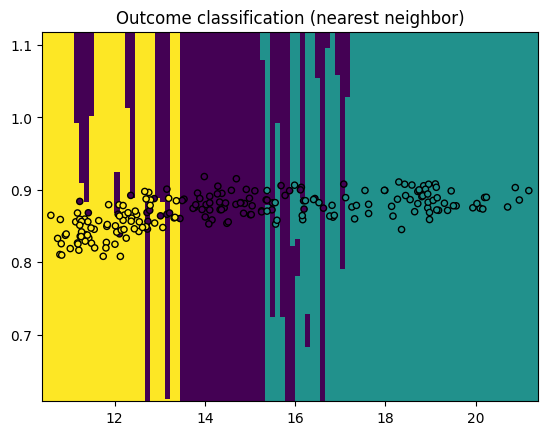

In [22]:
#Color mesh of predictions
z = z.reshape(xx.shape)
fig = plt.figure()
plt.pcolormesh(xx, yy, z)

#Scatter Plot of actual samples:
plt.scatter(features[:, 0], features[:, 1], c=labels, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Outcome classification (nearest neighbor)")
plt.show()

In [23]:
# Function that wraps up the classification and graphing with nicer colors

def graphClassifier2D(X,Y, classifier):
  # Create color maps
  cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFFF'])
  cmap_bold  = ListedColormap(['#FF0000', '#0000FF', '#00FFFF'])

  h = 0.1  # step size in the mesh
  x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
  y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  test_features = np.array([xx.ravel(), yy.ravel()]).transpose()
  z = classifier(X, Y, test_features)

  z = z.reshape(xx.shape)
  fig = plt.figure()
  plt.pcolormesh(xx, yy, z, cmap=cmap_light)

  plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold, edgecolor='k', s=20)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title("Outcome classification (nearest neighbor)")
  plt.xlabel("Area")
  plt.ylabel("Compactness")
  plt.show()

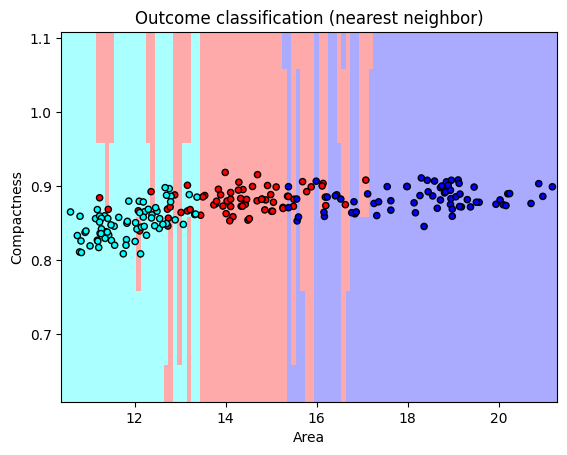

In [24]:
graphClassifier2D(features, labels, nn_classify)

Units don't match (cm vs cm^2), and ranges are vastly different (12-20 vs 0.8-0.95).

How can we fix this?

In [29]:
def graphClassifier2D(X,Y, classifier, normalize=False):
  # Create color maps
  cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFFF'])
  cmap_bold  = ListedColormap(['#FF0000', '#0000FF', '#00FFFF'])

  # z-score normalization!
  if normalize:
    ## TODO: add z-score normalization
    X -= X.mean(axis=0)
    X /= X.std(axis=0)

  h = 0.1  # step size in the mesh
  x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
  y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  test_features = np.array([xx.ravel(), yy.ravel()]).transpose()
  z = classifier(X, Y, test_features)

  z = z.reshape(xx.shape)
  fig = plt.figure()
  plt.pcolormesh(xx, yy, z, cmap=cmap_light)

  plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold, edgecolor='k', s=20)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title("Outcome classification (nearest neighbor)")
  plt.xlabel("Area")
  plt.ylabel("Compactness")
  plt.show()

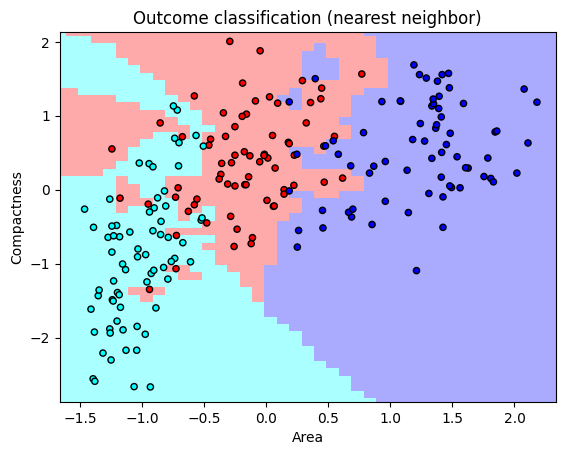

In [30]:
graphClassifier2D(features, labels, nn_classify, True)

## Avoiding overfitting

### Leave one out accuracy

In [31]:
# TODO: create helper function called nn_one_out_classify for classifying a set of example features (stored in numpy arrays!)
def nn_one_out_classify(training_set, training_labels):
  data_size = training_set.shape[0]
  result = np.zeros(data_size)
  for i in range(data_size):
    # take current point (i) out of the training set to predict its label
    one_out_train = np.concatenate([training_set[:i,:], training_set[i+1:,:]], axis=0)
    one_out_labels = np.concatenate([training_labels[:i], training_labels[i+1:]], axis = 0)
    # predicting current point on dataset that has it removed
    result[i] = nn_classify_sample(one_out_train, one_out_labels, training_set[i])
  return result

Leave one out accuracy: 81.42857142857143


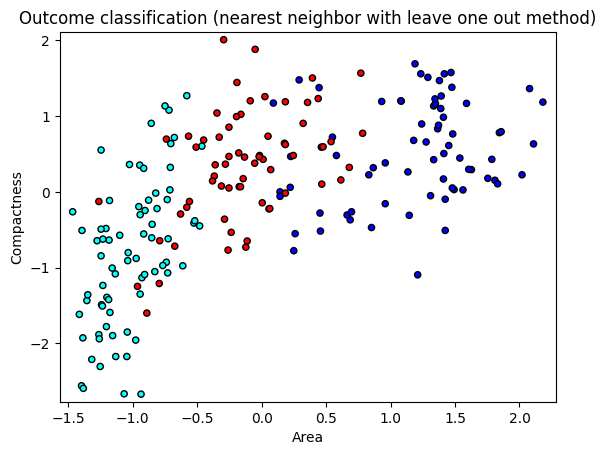

In [32]:
# Function that wraps up the classification and graphing with nicer colors
# note the data set was implicitly normalized in the graphClassifier2D function
# this implicitly changes should often be avoided or at least be be noted
one_out_labels = nn_one_out_classify(features, labels)

one_out_accuracy = 100 * np.sum(one_out_labels == labels) / labels.shape[0]
print(f"Leave one out accuracy: {one_out_accuracy}")

plt.scatter(features[:,0], features[:,1], c=one_out_labels, cmap=ListedColormap(['#FF0000', '#0000FF', '#00FFFF']), edgecolor='k', s=20)
plt.xlim(features[:,0].min()-0.1, features[:,0].max()+0.1)
plt.ylim(features[:,1].min()-0.1, features[:,1].max()+0.1)
plt.title("Outcome classification (nearest neighbor with leave one out method)")
plt.xlabel("Area")
plt.ylabel("Compactness")
plt.show()

### Train-test split

In [33]:
# shuffle the data so the training, test split is not biased
def shuffle_data(X, Y):
  n = Y.shape[0]
  shuffled_idx = np.arange(n)
  np.random.shuffle(shuffled_idx)

  shuffled_X = X[shuffled_idx]
  shuffled_Y = Y[shuffled_idx]

  return shuffled_X, shuffled_Y

# split data
def train_test_split(X, Y, ratio = 0.9):
  n = Y.shape[0]

  X_train = X[:int(n*ratio)]
  y_train = Y[:int(n*ratio)]

  X_test = X[int(n*ratio):]
  y_test = Y[int(n*ratio):]

  return X_train, y_train, X_test, y_test

# classify test data based on training data
def train_test_classifier(X, Y):
  shuffled_X, shuffled_Y = shuffle_data(X, Y)
  X_train, y_train, X_test, y_test = train_test_split(shuffled_X, shuffled_Y)
  return nn_classify(X_train, y_train, X_test), y_test

In [34]:
train_test_predictions, y_test = train_test_classifier(features, labels)
train_test_accuracy = 100 * np.sum(train_test_predictions == y_test) / y_test.shape[0]
print(f"Accuracy for train-test split: {train_test_accuracy}")

Accuracy for train-test split: 85.71428571428571
